### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/titanic - titanic.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dealing with null values and outliers

In [ ]:
data.shape

(891, 12)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
class_age = data[['Pclass','Age']]
medians = class_age.groupby('Pclass').median()
medians

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [ ]:
for i in range(3):
    idx = np.where((data['Pclass']==i+1) & (data['Age'].isnull()))[0]
    data.loc[idx,'Age'] = medians.values[i][0]

display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
display(data[data['Embarked'].isnull()])
similar_embarked = (data[(data['Pclass']==1) & (data['Fare']>=70) & (data['Fare']<=90)]['Embarked'])
print(similar_embarked.value_counts())
data['Embarked'].fillna('C',inplace = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked
S    20
C    19
Q     2
Name: count, dtype: int64


In [ ]:
data['Embarked'].isnull().sum()

0

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data['Cabin'].fillna('M',inplace = True)
# filling the null values in Cabin with Missing(M)
data['Cabin'] = data['Cabin'].str[0]
# filling the cabin column with first letter of cabin to identify the floor on titanic,
#the rest of the string is not so much important
data['Cabin'].value_counts()

,count
Cabin,
M,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [ ]:
idx = np.where(data['Cabin']=='T')[0]
data.loc[idx,'Cabin'] = 'M'
data['Cabin'].value_counts()

,count
Cabin,
M,688
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


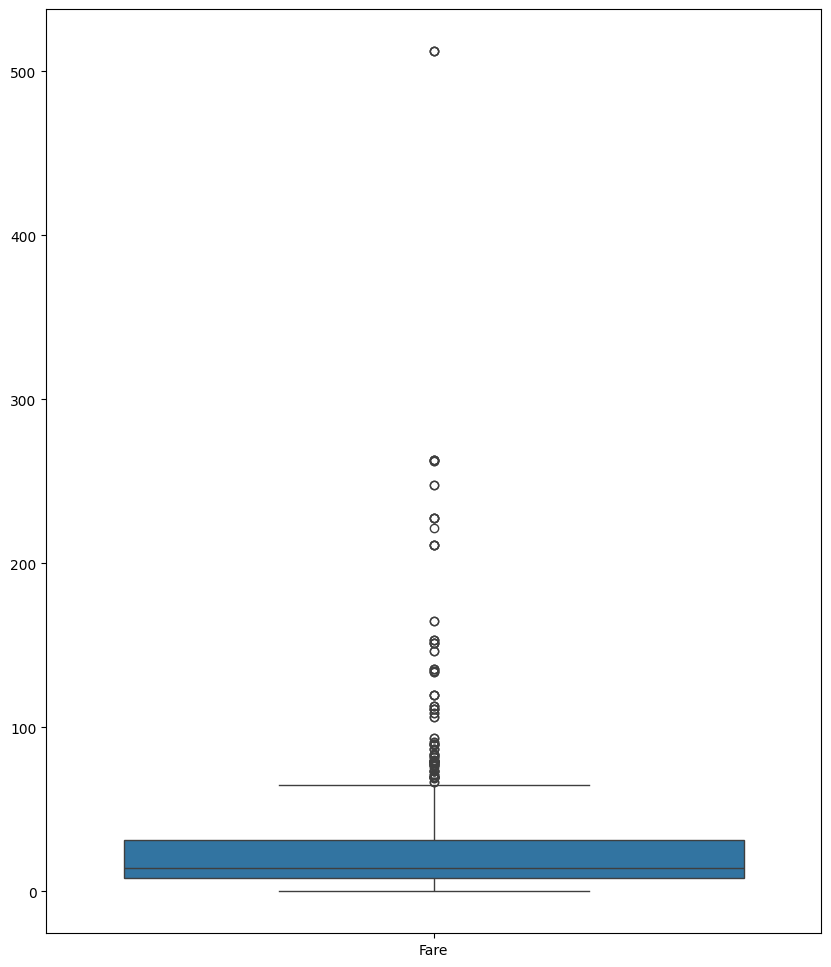

In [ ]:
plt.figure(figsize=(10,12)) # Set the Width & Height
sns.boxplot(data=data[['Fare']])
plt.show()

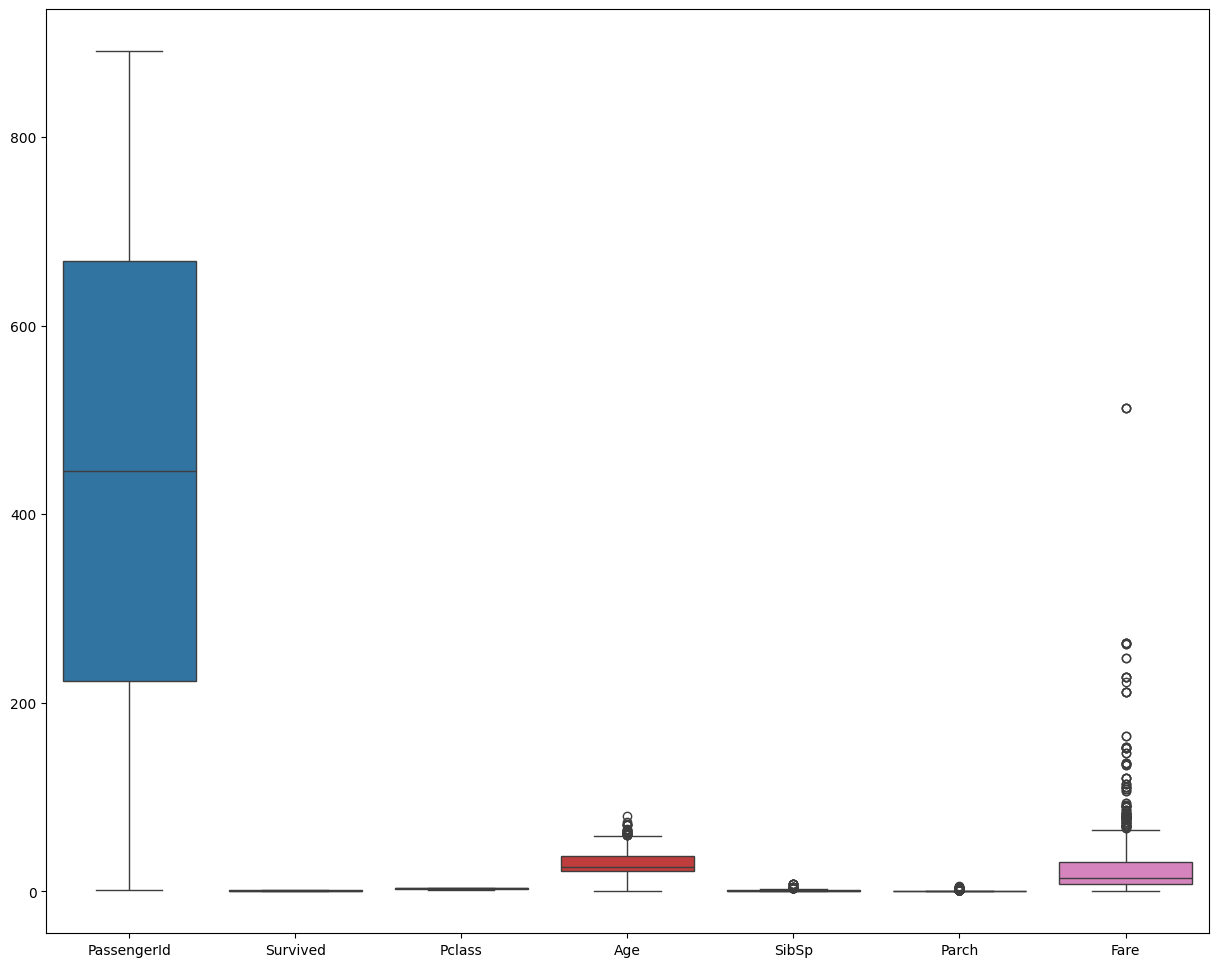

In [ ]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=data)
plt.show()

<Axes: ylabel='Density'>

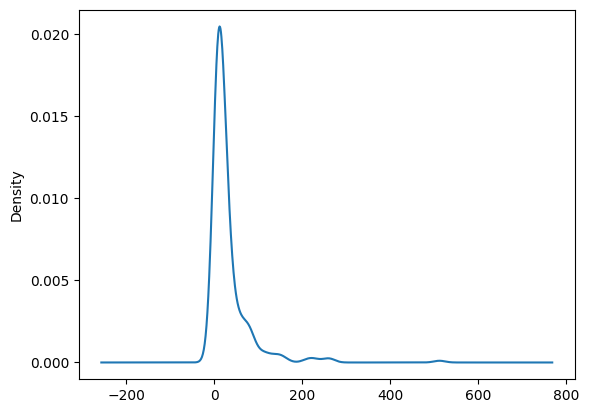

In [ ]:
data['Fare'].plot(kind='kde')

In [ ]:
data['Fare'].skew()

4.787316519674893

<Axes: >

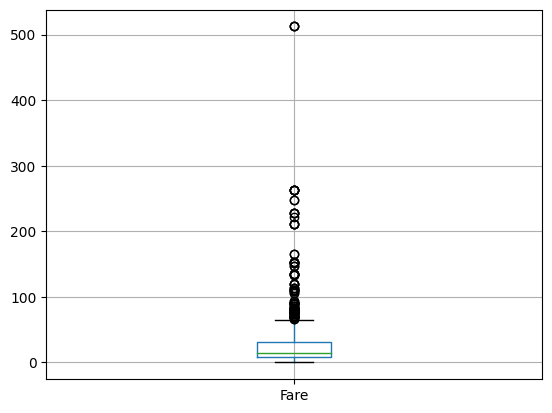

In [ ]:
data[['Fare']].boxplot()

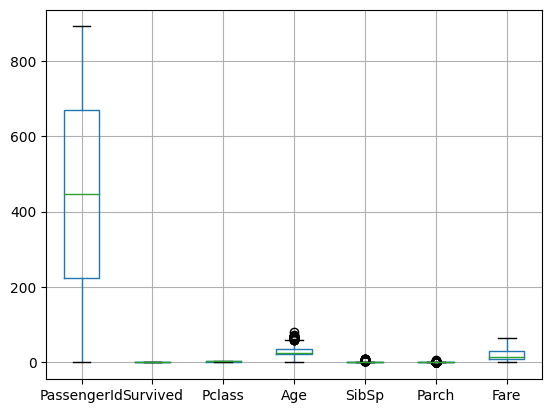

In [ ]:
# prompt: outlier treatment in fare using IQR

Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the bounds
data['Fare'] = np.where(data['Fare'] < lower_bound, lower_bound, data['Fare'])
data['Fare'] = np.where(data['Fare'] > upper_bound, upper_bound, data['Fare'])

# Verify the outlier treatment by plotting the boxplot again
data.boxplot()
plt.show()


### Dealt with null values and dealt with outliers with IQR

In [ ]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import LabelEncoder

#SS = StandardScaler()

#data['Fare'] = SS.fit_transform(data[['Fare']])

#data[['Fare']].skew()

In [ ]:
#data['Fare'].plot(kind='kde')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


#### Dealt with null values and outliers

### Label Encoding categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Sex'] = LE.fit_transform(data['Sex'])
data['Cabin'] = LE.fit_transform(data['Cabin'])
data['Embarked'] = LE.fit_transform(data['Embarked'])


In [ ]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,2
1,1,1,0,38.0,1,0,65.6344,2,0
2,1,3,0,26.0,0,0,7.9250,7,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,7,2


### Label Encoded the dataset

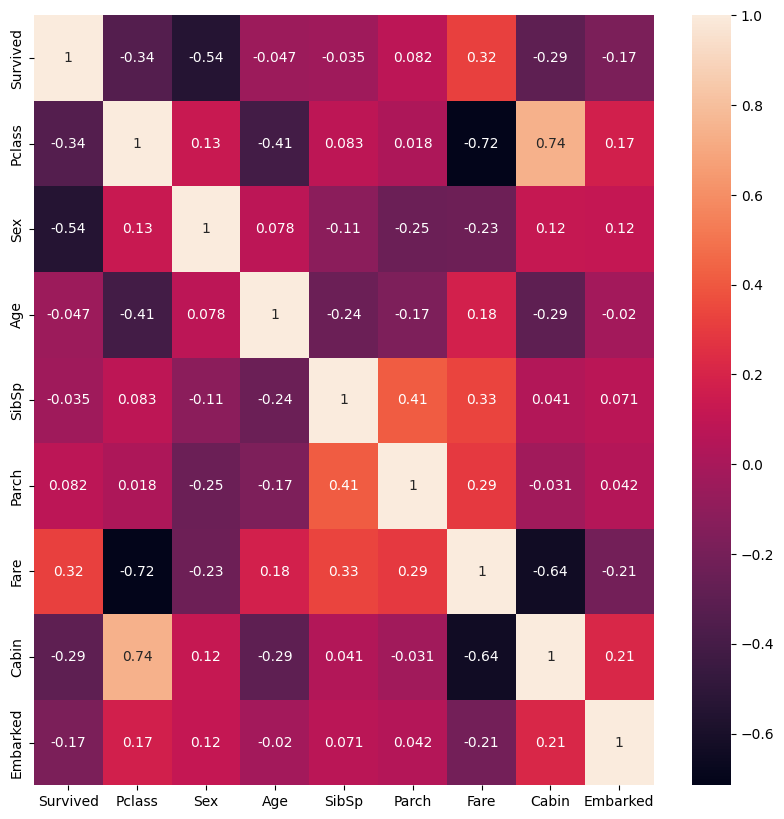

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
X = data.drop('Survived',axis=1)
y = data['Survived']

### Training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [ ]:
print(X_train)

[[ 0.81925059 -1.37207547 -0.38029245 ... -0.42957145  0.51092784
  -1.96453934]
 [-0.38096838  0.72882288  0.14525242 ... -0.66264932  0.51092784
   0.58327853]
 [-0.38096838  0.72882288  0.14525242 ...  0.6390369   0.51092784
  -1.96453934]
 ...
 [ 0.81925059  0.72882288 -0.38029245 ... -0.79852874  0.51092784
  -0.69063041]
 [ 0.81925059 -1.37207547  0.52064161 ... -0.32377341  0.51092784
   0.58327853]
 [-0.38096838  0.72882288  2.32250974 ...  0.73705552  0.51092784
   0.58327853]]


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,2
1,1,0,38.0,1,0,65.6344,2,0
2,3,0,26.0,0,0,7.9250,7,2
3,1,0,35.0,1,0,53.1000,2,2
4,3,1,35.0,0,0,8.0500,7,2


In [ ]:
print(X_test)

[[ 0.81925059  0.72882288 -0.38029245 ... -0.46824751  0.51092784
  -1.96453934]
 [ 0.81925059  0.72882288 -0.38029245 ... -0.80753105  0.51092784
   0.58327853]
 [ 0.81925059  0.72882288 -1.65661571 ...  0.25207007  0.51092784
  -0.69063041]
 ...
 [-1.58118735 -1.37207547  0.14525242 ...  2.04513618 -1.42150574
  -1.96453934]
 [ 0.81925059  0.72882288 -0.45537029 ... -0.79259104  0.51092784
   0.58327853]
 [ 0.81925059  0.72882288 -0.75568165 ... -0.78297482  0.51092784
   0.58327853]]


In [ ]:
print(y_train)

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64


## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

### Predicting a new result

In [ ]:
#print(classifier.predict(SS.transform([[3,0,22.0,1,0,7.2500,7,2]])))

In [ ]:
print(y_train)

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64


### Predicting the test set results

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[86 24]
 [11 58]]


0.8044692737430168